# Tutorial 3 - Dimensionality reduction and clustering

In this tutorial, we'll look at techniques of reducing the dimension of data and techniques for clustering data.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import sklearn
from torchvision import datasets, transforms

## Dimensionality reduction

We are focusing on Unsupervised learning, which is a category where the model is trained on a sample of the input data only and generally tries to find structure or patterns in the data. Dimensionality reduction, specifically PCA, falls into this category.

### Principal Component Analysis (PCA)

First, let's load the Iris dataset, a very simple dataset with 150 samples, 3 classes and 4 features.

In [2]:
iris = load_iris()
X = iris.data  # Input features (Sepal length/width, Petal length/width)
y = iris.target # Target labels (Setosa, Versicolor, Virginica)

print("Input shape X:", X.shape)
print("Output shape y:", y.shape) 

Input shape X: (150, 4)
Output shape y: (150,)


Next, we'll create a PCA model using scikit-learn. This model follows the standard fit-transform interface, which we'll use on the whole dataset here:

In [3]:
pca_sklearn = PCA(n_components=2) 
pca_sklearn.fit(X) 

X_reduced_sklearn = pca_sklearn.transform(X)

print("Original data shape:", X.shape)
print("Reduced data shape:", X_reduced_sklearn.shape)

Original data shape: (150, 4)
Reduced data shape: (150, 2)


Let's plot the resulting 2D represenation of the dataset:

In [4]:
def plot_pca(X, y, title, axis = "Principal Component"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = "viridis") 
    plt.title(title)
    plt.xlabel(axis + " 1")
    plt.ylabel(axis + " 2")
    plt.show()

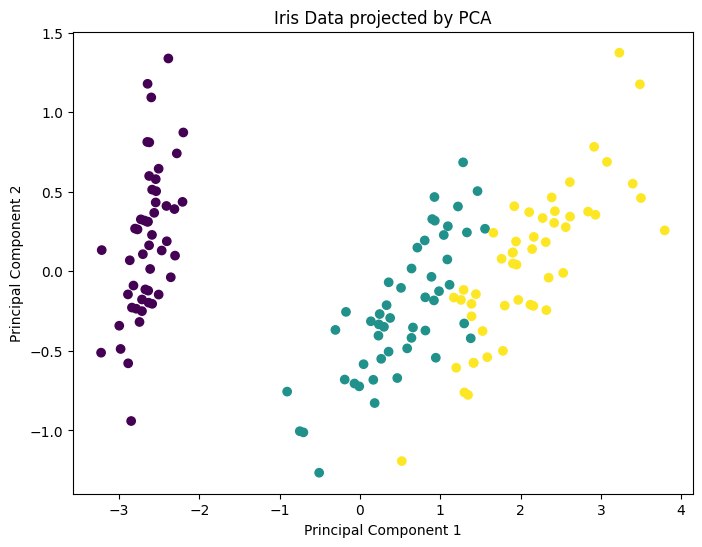

In [5]:
plot_pca(X_reduced_sklearn, y, "Iris Data projected by PCA")

### Task 1: Manual implementation of PCA

The input data $X$ must be handled as a matrix $X \in \mathbb{R}^{n \times d}$, where $n$ is the number of samples and $d$ is the number of features.

**Goal:** To find a projection matrix $W$ that transforms the high-dimensional data $X$ into a lower-dimensional space $X_{reduced} \in \mathbb{R}^{n \times k}$ ($k < d$) while retaining the maximum variance.

#### 1. Centering the Data

PCA is sensitive to the mean of the data. The first step involves centering the data matrix $X$ by subtracting the mean of each feature (column) from all values in that feature.

$$
\text{Centering: } X_{\text{centered}} = X - \mu_X
$$

(Where $\mu_X$ is the vector of means for each feature.) This ensures that the first principal component is not simply representing the mean of the data.

#### 2. Calculating the Covariance Matrix ($\Sigma$)

The covariance matrix $\Sigma$ captures the variance of each feature and the covariance (relationship) between all pairs of features. This step is critical because PCA aims to find directions (components) that maximize variance.

For centered data $X_{\text{centered}}$, the covariance matrix is calculated using matrix multiplication and scaling:

$$
\Sigma = \frac{1}{n-1} X_{\text{centered}}^T X_{\text{centered}}
$$

#### 3. Eigendecomposition

This step finds the fundamental directions of variance in the data. Eigendecomposition is applied to the covariance matrix $\Sigma$.

The process finds the **eigenvectors** and **eigenvalues** of $\Sigma$:

$$
\Sigma \vec{v} = \lambda \vec{v}
$$

*   The **eigenvectors** ($\vec{v}$) of $\Sigma$ are the **Principal Components (PCs)**. They represent the new, orthogonal axes (directions of variance).
*   The **eigenvalues** ($\lambda$) are scalar values that represent the magnitude of variance captured along their corresponding eigenvector (PC).

#### 4. Selecting Components and Projection

1.  **Sort:** The eigenvectors (PCs) are sorted in descending order based on their corresponding eigenvalues. The components with the largest eigenvalues capture the most variance and are thus the most important.
2.  **Select $k$:** A user selects the top $k$ principal components (e.g., $k=2$ for visualization). These $k$ eigenvectors form the **projection matrix** $W$.
3.  **Project:** The original centered data is multiplied by the projection matrix $W$ to reduce its dimensionality:

$$
X_{\text{reduced}} = X_{\text{centered}} W
$$

The result, $X_{\text{reduced}}$, is the data projected onto the lower-dimensional subspace, ready for data visualization or further analysis. This projection step is a matrix multiplication.

#### Solution

In [6]:
k = 2 # Target dimensionality

X_centered = X - np.mean(X, axis=0)
Sigma = np.cov(X_centered, rowvar=False) 
eigenvalues, eigenvectors = np.linalg.eigh(Sigma)

idx = np.flip(np.argsort(eigenvalues))
W = eigenvectors[:, idx[:k]] # W is the Projection Matrix

X_reduced = X_centered @ W

Original data shape: (150, 4)
Projected data shape (Manual): (150, 2)


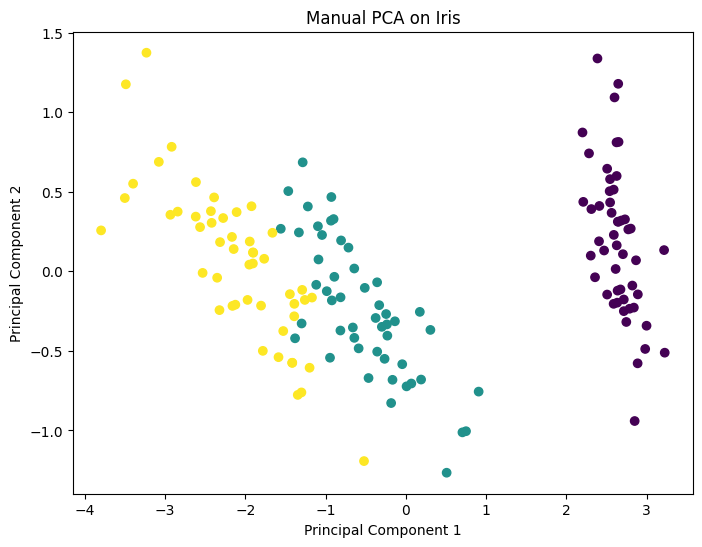

In [7]:
print("Original data shape:", X.shape)
print("Projected data shape (Manual):", X_reduced.shape)
plot_pca(X_reduced, y, "Manual PCA on Iris")

### t-SNE: An alternative to PCA

t-SNE is a much newer and a much more complicated alternative to PCA.

The t-SNE algorithm comprises two main stages. First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects are assigned a higher probability while dissimilar points are assigned a lower probability. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence (KL divergence) between the two distributions with respect to the locations of the points in the map. (Wikipedia)

In [8]:
X_reduced_tsne = TSNE().fit_transform(X)

Original data shape: (150, 4)
Projected data shape: (150, 2)


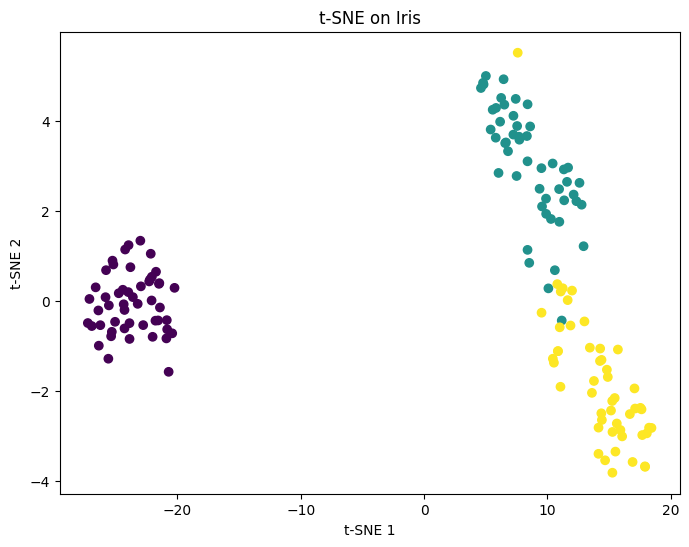

In [9]:
print("Original data shape:", X.shape)
print("Projected data shape:", X_reduced_tsne.shape)
plot_pca(X_reduced_tsne, y, "t-SNE on Iris", "t-SNE")

### More complex datasets: MNIST

Let's also compare PCA and t-SNE on a much more complex dataset: MNIST.

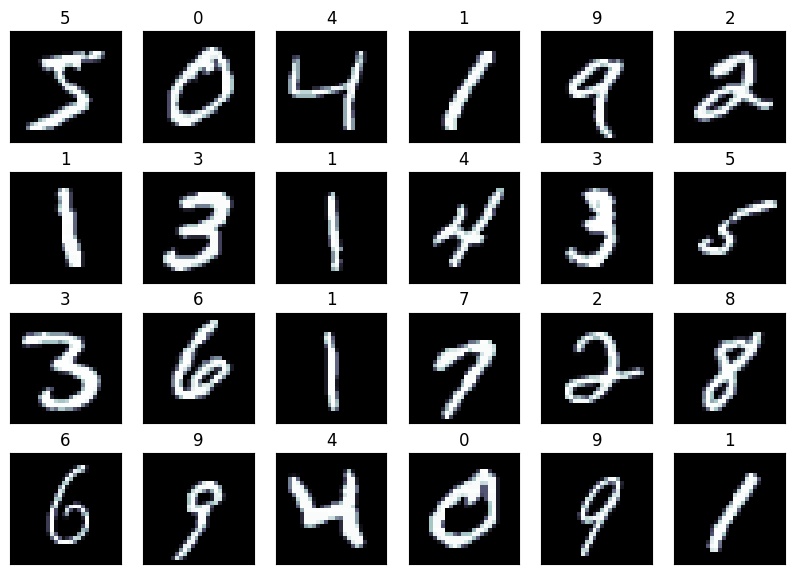

In [10]:
mnist = datasets.MNIST(
    root = "data",
    download = True,
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0, 1)])
)
mnist_flat = np.reshape(mnist.data, (mnist.data.shape[0], mnist.data.shape[1] * mnist.data.shape[2]))[:10000]

plt.figure(figsize=(10, 7))
for i in range(24):
    plt.subplot(4, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mnist[i][0].reshape(28, 28), cmap = plt.cm.bone)
    plt.title(mnist[i][1])

In [11]:
pca_mnist = PCA(n_components=2) 
mnist_reduced_pca = pca_mnist.fit_transform(mnist_flat) 
print("Original data shape:", mnist_flat.shape)
print("Reduced data shape:", mnist_reduced_pca.shape)

Original data shape: torch.Size([10000, 784])
Reduced data shape: (10000, 2)


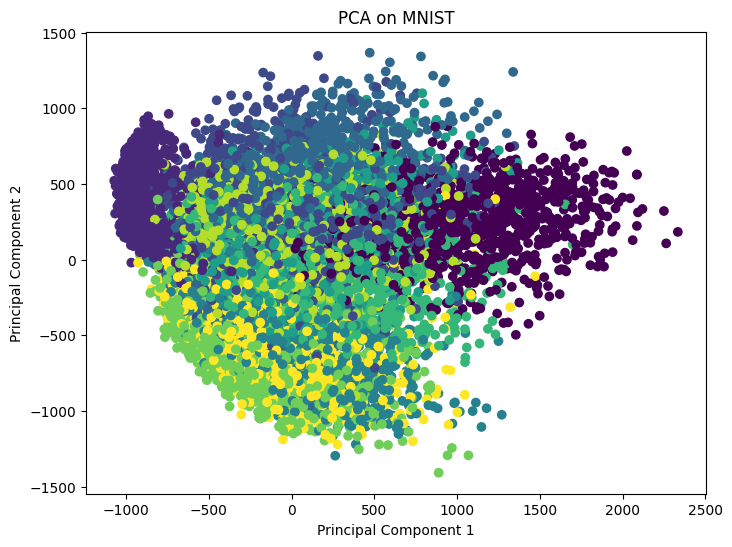

In [12]:
plot_pca(mnist_reduced_pca, mnist.targets[:10000], "PCA on MNIST")

Given that MNIST is an image dataset, we can also visualize the individual principal components:

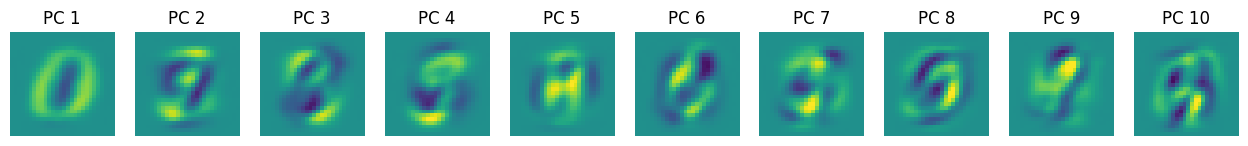

In [13]:
n_components = 10
pca_mnist = PCA(n_components).fit(mnist_flat)
fig = plt.figure(figsize=(n_components*np.power(n_components, 1/5),3))
axes = []
for i in range(n_components):
    ax_ = fig.add_subplot(1, n_components, i+1)
    ax_.imshow(pca_mnist.components_[i].reshape(28,28), interpolation='nearest', clim=(-.15, .15));
    ax_.set_title(f'PC {i+1}')
    ax_.axis('off')
    axes.append(ax_)

In [14]:
mnist_reduced_tsne = TSNE().fit_transform(mnist_flat)
print("Original data shape:", mnist_flat.shape)
print("Reduced data shape:", mnist_reduced_tsne.shape)

Original data shape: torch.Size([10000, 784])
Reduced data shape: (10000, 2)


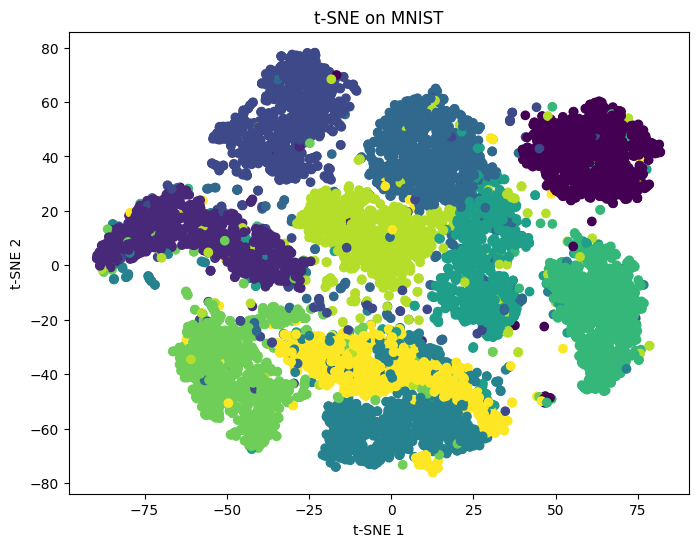

In [15]:
plot_pca(mnist_reduced_tsne, mnist.targets[:10000], "t-SNE on MNIST", "t-SNE")

## K-means clustering

K-means Clustering is a partitioning method used in unsupervised learning to divide $n$ data points into $K$ distinct, non-overlapping subsets (clusters). The fundamental goal is to find structure or patterns in the data.

In [16]:
model_kmeans = KMeans(n_clusters = 3, random_state = 42) 
model_kmeans.fit(X) 
cluster_labels = model_kmeans.predict(X)
centroids = model_kmeans.cluster_centers_
print("Centroids shape:", centroids.shape)

Centroids shape: (3, 4)


Let's plot, side-by-side, the true labels and the assigned clusters.

In [17]:
def plot_kmeans(X, y, cluster_labels, centroids):
    pca = PCA(n_components=2).fit(X)
    X_reduced = pca.transform(X)
    centroids_reduced = pca.transform(centroids)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    axes[0].scatter(X_reduced[:, 0], X_reduced[:, 1], c = y, cmap = "viridis")
    axes[0].set_title("True labels")
    axes[0].set_xlabel("Principal Component 1")
    axes[0].set_ylabel("Principal Component 2")

    axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c = cluster_labels, cmap = "viridis")
    axes[1].set_title("K-means clusters and centroids")
    axes[1].set_xlabel("Principal Component 1")
    axes[1].set_ylabel("Principal Component 2")

    axes[1].scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], marker='X', s=200, color='red', edgecolor='black')

    plt.show()

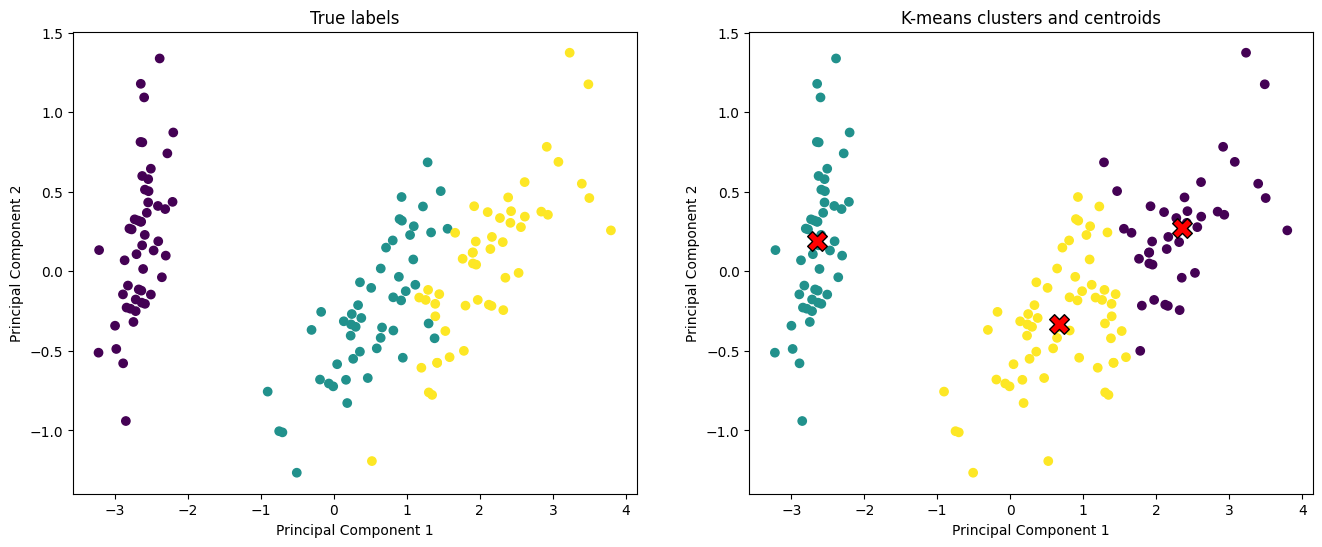

In [18]:
plot_kmeans(X, y, cluster_labels, centroids)

### Task 2: Manual implementation of K-means

The Core Concept: The algorithm operates iteratively to minimize the inertia, which is the sum of squared distances between each point and the centroid of its assigned cluster.

The K-means Iterative Process:

1. **Initialization:** $K$ initial centroids ($\mu_1, \mu_2, \dots, \mu_k$) are chosen randomly from the data (or via a smart selection method like k-means++).
2. **Assignment Step:** Each data point is assigned to the nearest centroid.
3. **Update Step:** The centroids are recalculated as the mean of all data points assigned to that cluster. This new mean becomes the new centroid.
4. **Convergence:** The process repeats (steps 2 and 3) until the cluster assignments no longer change, or a maximum number of iterations is reached.


Reimplementing K-means manually requires an iterative loop, distance calculations, and recalculation of means, all leveraging NumPy. This follows the spirit of the Manual optimisation of linear regression, which showed the capability of NumPy to handle complex, iterative mathematical tasks.

In [19]:
k = 3
np.random.seed(42)
max_iterations = 100

n_samples, n_features = X.shape

random_indices = np.random.choice(n_samples, k, replace=False)
centroids = X[random_indices]
cluster_labels = np.zeros(n_samples, dtype=int)

for i in range(max_iterations):
    old_centroids = centroids.copy()
        
    distances = np.sum((X[:, np.newaxis] - centroids)**2, axis=2)
    cluster_labels = np.argmin(distances, axis=1)

    new_centroids = np.zeros((k, n_features))
    for j in range(k):
        points_in_cluster = X[cluster_labels == j]

        if len(points_in_cluster) > 0:
            new_centroids[j] = np.mean(points_in_cluster, axis=0)
        else:
            new_centroids[j] = old_centroids[j]
        
    centroids = new_centroids

    if np.allclose(old_centroids, centroids):
       break

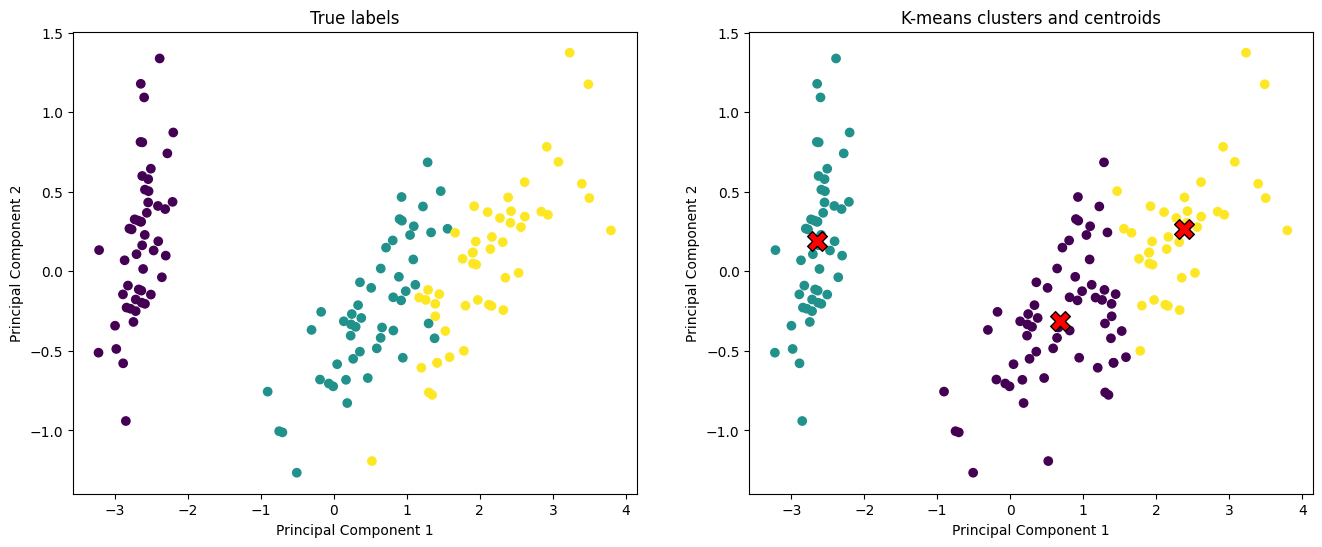

In [20]:
plot_kmeans(X, y, cluster_labels, centroids)